In [50]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit

messages=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Bigram_Combine NEW sent pol.csv',header=None,names=["sentiment","text","polarity","repetations"])
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
#from nltk.stem import WordNetLemmatizer


In [51]:
#descriptions
print(messages.describe())

           polarity   repetations
count  54937.000000  54937.000000
mean       0.012156      1.540619
std        0.151065      5.874779
min       -1.000000      1.000000
25%        0.000000      1.000000
50%        0.000000      1.000000
75%        0.000000      1.000000
max        1.000000    464.000000


In [52]:
# class distribution
print(messages.groupby('sentiment').size())

sentiment
negative     2939
neutral     47051
positive     4947
dtype: int64


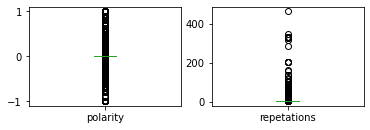

In [53]:
from matplotlib import pyplot
messages.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

In [54]:
messages['text']

0                covid cases
1                  new cases
2        valentinesday covid
3               red nviolets
4              nviolets blue
                ...         
54932            caseload th
54933               day wait
54934             wait watch
54935             watch says
54936           covid odisha
Name: text, Length: 54937, dtype: object

In [55]:
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer
import re
corpus = []
lemmatizer = WordNetLemmatizer()
 
    



for i in range(0,len(messages['text'])):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    non_word=['n','rt','xe','xa','xc','co','xf','xxd','xs','x','nx','ni','nfor','nhow','eh','de''amo','nis','wa']
    review=[e for e in review if e not in non_word]
    corpus.append(review)

In [56]:
len(corpus)

54937

In [57]:
X=[]
for i in range (len(corpus)):
    c=''.join([str(elem+" ") for elem in corpus[i]])
    X.append(c)


In [58]:
len(X)

54937

In [60]:
#bag of words converting X in vector numbers
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000)
Y=cv.fit_transform(X).toarray()

#y_score(y_test,y_pred)

In [61]:
w=messages["sentiment"]
w.shape

(54937,)

In [62]:
Y.shape

(54937, 1000)

In [87]:
#training dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)
import time
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("MultinomialNB accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)




 time taken by method is 0.007157802581787109 sec
[[  65  507    1]
 [   0 9424    6]
 [   4  709  272]]
MultinomialNB accuracy is = 0.8883327266108482
              precision    recall  f1-score   support

    negative       0.94      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.93      0.46      0.52     10988
weighted avg       0.90      0.89      0.86     10988



In [101]:
#bag of words converting X in vector numbers
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=100)
Y=cv.fit_transform(X).toarray()

#y_score(y_test,y_pred)

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.naive_bayes import GaussianNB
spam_detect_model=GaussianNB().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("GaussianNB accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.060268402099609375 sec
[[ 488   77    8]
 [6734 2536  160]
 [ 603  100  282]]
GaussianNB accuracy is = 0.30087368037859485
              precision    recall  f1-score   support

    negative       0.06      0.85      0.12       573
     neutral       0.93      0.27      0.42      9430
    positive       0.63      0.29      0.39       985

    accuracy                           0.30     10988
   macro avg       0.54      0.47      0.31     10988
weighted avg       0.86      0.30      0.40     10988



In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.naive_bayes import BernoulliNB
spam_detect_model=BernoulliNB().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

#from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("BernoulliNB accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.019713878631591797 sec
[[  65  507    1]
 [   0 9424    6]
 [   4  709  272]]
BernoulliNB accuracy is = 0.8883327266108482
              precision    recall  f1-score   support

    negative       0.94      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.93      0.46      0.52     10988
weighted avg       0.90      0.89      0.86     10988



In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression
spam_detect_model=LogisticRegression().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("LogisticRegression accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.007999658584594727 sec
[[  65  507    1]
 [   0 9424    6]
 [   4  709  272]]
LogisticRegression accuracy is = 0.8883327266108482
              precision    recall  f1-score   support

    negative       0.94      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.93      0.46      0.52     10988
weighted avg       0.90      0.89      0.86     10988



In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.tree import DecisionTreeClassifier
spam_detect_model=DecisionTreeClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("DecisionTreeClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.010099172592163086 sec
[[  64  507    2]
 [   0 9424    6]
 [   3  710  272]]
DecisionTreeClassifier accuracy is = 0.8882417182380778
              precision    recall  f1-score   support

    negative       0.96      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.94      0.46      0.52     10988
weighted avg       0.90      0.89      0.85     10988



In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier

spam_detect_model=KNeighborsClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("KNeighborsClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 87.32756924629211 sec
[[  57  514    2]
 [   1 9423    6]
 [   4  738  243]]
KNeighborsClassifier accuracy is = 0.884874408445577
              precision    recall  f1-score   support

    negative       0.92      0.10      0.18       573
     neutral       0.88      1.00      0.94      9430
    positive       0.97      0.25      0.39       985

    accuracy                           0.88     10988
   macro avg       0.92      0.45      0.50     10988
weighted avg       0.89      0.88      0.85     10988



In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

spam_detect_model=LinearDiscriminantAnalysis().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("LinearDiscriminantAnalysis accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.008768796920776367 sec
[[  65  507    1]
 [   0 9424    6]
 [   4  709  272]]
LinearDiscriminantAnalysis accuracy is = 0.8883327266108482
              precision    recall  f1-score   support

    negative       0.94      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.93      0.46      0.52     10988
weighted avg       0.90      0.89      0.86     10988



In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.svm import LinearSVC

spam_detect_model=LinearSVC().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("LinearSVC accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.0 sec
[[  65  507    1]
 [   0 9424    6]
 [   4  709  272]]
LinearSVC accuracy is = 0.8883327266108482
              precision    recall  f1-score   support

    negative       0.94      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.93      0.46      0.52     10988
weighted avg       0.90      0.89      0.86     10988



In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.svm import SVC

spam_detect_model= SVC().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("SVC accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 19.321500778198242 sec
[[  52  520    1]
 [   0 9424    6]
 [   3  747  235]]
SVC accuracy is = 0.8837823079723335
              precision    recall  f1-score   support

    negative       0.95      0.09      0.17       573
     neutral       0.88      1.00      0.94      9430
    positive       0.97      0.24      0.38       985

    accuracy                           0.88     10988
   macro avg       0.93      0.44      0.50     10988
weighted avg       0.89      0.88      0.85     10988



In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.ensemble import AdaBoostClassifier

spam_detect_model=AdaBoostClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("AdaBoostClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.2958064079284668 sec
[[  65  507    1]
 [   0 9424    6]
 [   4  710  271]]
AdaBoostClassifier accuracy is = 0.8882417182380778
              precision    recall  f1-score   support

    negative       0.94      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.93      0.46      0.52     10988
weighted avg       0.90      0.89      0.85     10988



In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import RidgeClassifier
spam_detect_model=RidgeClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("RidgeClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.016864538192749023 sec
[[  65  507    1]
 [   0 9424    6]
 [   4  709  272]]
RidgeClassifier accuracy is = 0.8883327266108482
              precision    recall  f1-score   support

    negative       0.94      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.93      0.46      0.52     10988
weighted avg       0.90      0.89      0.86     10988



In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import PassiveAggressiveClassifier
spam_detect_model=PassiveAggressiveClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("PassiveAggressiveClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.0 sec
[[  64  507    2]
 [   0 9424    6]
 [   3  709  273]]
PassiveAggressiveClassifier accuracy is = 0.8883327266108482
              precision    recall  f1-score   support

    negative       0.96      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.94      0.46      0.52     10988
weighted avg       0.90      0.89      0.86     10988



In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import Perceptron
spam_detect_model=Perceptron().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Perceptron accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.012224912643432617 sec
[[  64  507    2]
 [   0 9424    6]
 [   4  709  272]]
Perceptron accuracy is = 0.8882417182380778
              precision    recall  f1-score   support

    negative       0.94      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.93      0.46      0.52     10988
weighted avg       0.90      0.89      0.85     10988



In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.neural_network import MLPClassifier
spam_detect_model=MLPClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("MLPClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.05279970169067383 sec
[[  64  507    2]
 [   0 9424    6]
 [   3  710  272]]
MLPClassifier accuracy is = 0.8882417182380778
              precision    recall  f1-score   support

    negative       0.96      0.11      0.20       573
     neutral       0.89      1.00      0.94      9430
    positive       0.97      0.28      0.43       985

    accuracy                           0.89     10988
   macro avg       0.94      0.46      0.52     10988
weighted avg       0.90      0.89      0.85     10988



In [115]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,1].values
q[0:14]

0      neutral
1     positive
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10     neutral
11     neutral
12     neutral
13     neutral
14     neutral
15    positive
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

Accuracy of the LR model is for neutral class 0.8887877684746996
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.683


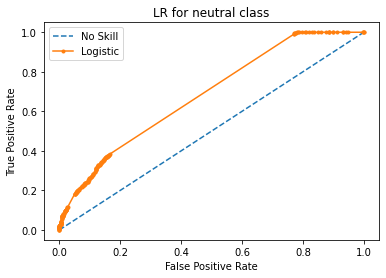

In [116]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


Accuracy of the LR model is for neutral class 0.8887877684746996
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.609


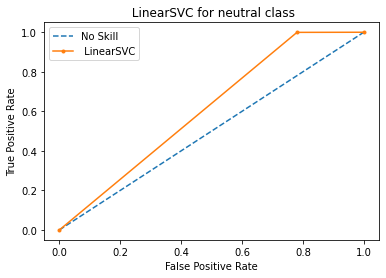

In [117]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [118]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,2].values
q[0:14]

0      neutral
1     positive
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10     neutral
11     neutral
12     neutral
13     neutral
14     neutral
15    positive
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

Accuracy of the LR model is for positive class 0.9344739716053877
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.705


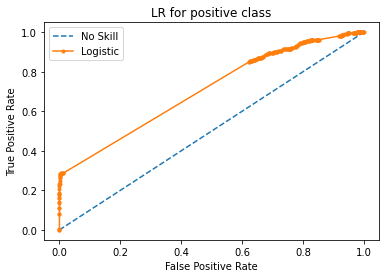

In [119]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for positive class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for positive class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy of the LR model is for neutral class 0.9344739716053877
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.638


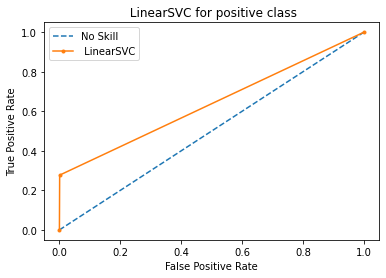

In [120]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for positive class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [121]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,0].values
q[0:14]

0      neutral
1     positive
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10     neutral
11     neutral
12     neutral
13     neutral
14     neutral
15    positive
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Accuracy of the LR model is for negative class 0.953403713141609
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.635


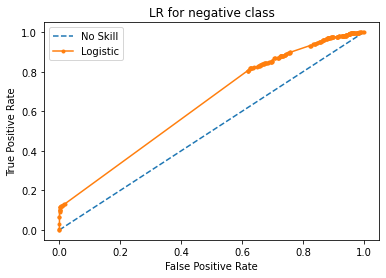

In [122]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for negative class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for negative class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy of the LR model is for neutral class 0.953403713141609
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.557


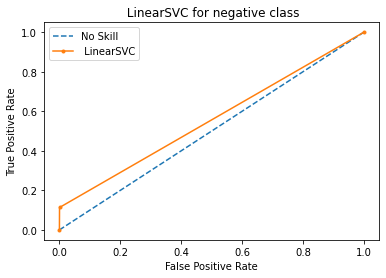

In [123]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for negative class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy of the MLP  negative model is 0.9534947215143793
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.637


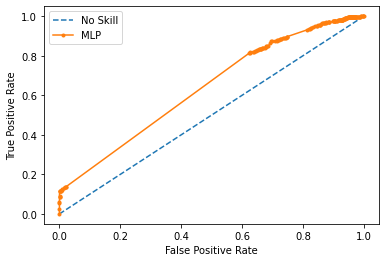

In [124]:
# roc curve and auc
#from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = MLPClassifier()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the MLP  negative model is", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()